In [1]:
from Simulator import *
import random

In [2]:
weights = []
for i in range(8):
    weights.append(random.randint(0, 50))
for i in range(28):
    weights.append(random.randint(-50, 50))
print(weights)

[44, 16, 26, 49, 37, 47, 45, 24, 34, 37, 38, 47, -33, 13, 28, -38, 41, 33, -14, -14, -25, 10, -8, -40, 18, -50, -19, 0, -50, 30, -37, 8, 20, -30, 0, -18]


[0.018867924528301886, 0.025188679245283018, 0.03443396226415094, 0.050566037735849056, 0.07132075471698113, 0.09849056603773584, 0.11273584905660376, 0.12386792452830189, 0.14018867924528303, 0.14669811320754716, 0.15650943396226416, 0.16292452830188678, 0.17235849056603772, 0.17613207547169812, 0.1811320754716981, 0.18849056603773584, 0.189811320754717, 0.19179245283018867, 0.19292452830188678, 0.19566037735849054, 0.2039622641509434, 0.20641509433962263, 0.21339622641509434, 0.22367924528301888, 0.22849056603773585, 0.2378301886792453, 0.25433962264150944, 0.264622641509434, 0.27301886792452834, 0.2839622641509434, 0.29735849056603775, 0.3121698113207548, 0.3286792452830189, 0.33867924528301885, 0.34018867924528307, 0.35188679245283017, 0.3530188679245283, 0.3586792452830189, 0.3639622641509434, 0.3713207547169811, 0.3735849056603774, 0.37575471698113205, 0.385566037735849, 0.3891509433962264, 0.3838679245283019, 0.39952830188679245, 0.4131132075471698, 0.41594339622641513, 0.425471

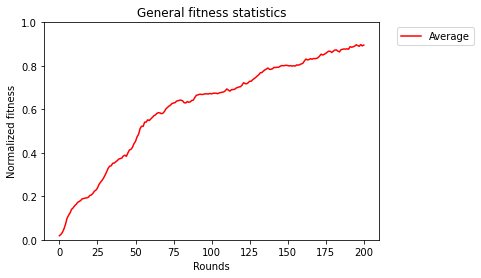

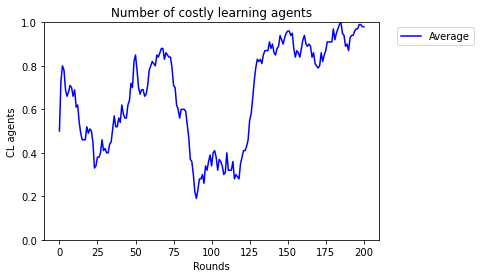

Constraint graph available only for binary constraints
CPU times: total: 26.9 s
Wall time: 27.7 s


In [4]:
%%time

initial = [0] * 16
learning_probability = 0.01
probability = 0.01
rounds = 200
orgNum = 100
clause1 = ConstraintSat([1],0)
clause2 = ConstraintSat([2],7)
clause3 = ConstraintSat([3],7)
clause4 = ConstraintSat([4],7)
clause5 = ConstraintSat([5],7)
clause6 = ConstraintSat([6],7)
clause7 = ConstraintSat([7],7)
clause8 = ConstraintSat([8],7)
clause9 = ConstraintSat([9],7)
clause10 = ConstraintSat([10],7)
clause11 = ConstraintSat([11],7)
clause12 = ConstraintSat([12],7)
clause13 = ConstraintSat([13],7)
clause14 = ConstraintSat([14],7)
clause15 = ConstraintSat([15],7)
clause16 = ConstraintSat([16],7)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6,
clause7, clause8, clause9, clause10, clause11, clause12, clause13,
clause14, clause15, clause16]

mySim = Simulator(1, initial, learning_probability, probability, rounds, orgNum, clauses, None, 1, 1)
mySim.run()
print(mySim.getAvgFit())
mySim.printStatistics()
#mySim.printLocalStatistics()
mySim.printAgentStatistics()
mySim.plotConstraintGraph()

In [ ]:
initial = [0] * 8
probability = 0.01
rounds = 500
orgNum = 100

constraints = []

weights = [31, 13, 16, 36, 32, 45, 22, 49, -32, -50, 49, -48, -18, -10, -20, 31, 14, -26, 43, 8, 34, 1, 35, -16, -1, -9, -7, -35, -7, -44, -2, -1, 43, -6, 50, -6]

l = 0

for i in range(8):
    constraints.append(ConstraintBinaryModelUnary(i, weights[l]))
    l += 1
    
for i in range(7):
    for j in range(i + 1, 8):
        w = weights[l]
        l += 1
        if w < 0:
            constraints.append(ConstraintBinaryModelBinaryDifferent([i,j],[-w,-w]))
        else:
            constraints.append(ConstraintBinaryModelBinarySame([i,j],[0,w]))

mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1, False, [0, 1, 1, 0, 1, 1, 1, 1])
print(mySim.getMaxPossibleFitAndGenome())
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
def repeatedSimulation(consCode, initial, probability, rounds, orgNum, constraints, domains, fitOffset, mutType, rep):
    maxFit = []
    avgFit = []
    for i in range(rep):
        mySim = Simulator(consCode, initial, probability, rounds, orgNum, constraints, domains, fitOffset, mutType)
        mySim.run()
        currAvgFit = np.array(mySim.getAvgFit())
        currMaxFit = np.array(mySim.getMaxFit())
        avgFit.append(currAvgFit)
        maxFit.append(currMaxFit)
        print(i)
    maxFit = np.average(maxFit, axis = 0)
    avgFit = np.average(avgFit, axis = 0)
    plt.title("Fitness statistics")
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xlabel("Rounds")
    plt.ylabel("Fitness")
    rnds = []
    for i in range(rounds + 1):
        rnds.append(i)
    plt.plot(rnds, maxFit, label = "Max fitness", color = 'green')
    plt.plot(rnds, avgFit, label = "Average fitness", color = 'red')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

        

In [ ]:
#initial = [1] * 18 + [0,0]
#initial = [0] * 18 + [1,1]
initial = [0] * 20
probability = 0.01
rounds = 3000
orgNum = 100

cache = {}
cachesp = {}
cachesm = {}
cachen = {}
def myFunc(args):
    
    def neighbours(x):
        tx = tuple(x)
        if tx in cachen:
            return cachen[tx]
        res = []
        for i in range(len(x)):
            curr = x.copy()
            curr[i] = 1 - curr[i]
            res.append(curr)
        cachen[tuple(x)] = res
        return res
    
    def s_plus(x):
        tx = tuple(x)
        if tx in cachesp:
            return cachesp[tx]
        fx = myFunc(x)
        mxm = 0
        for y in neighbours(x):
            fy = myFunc(y)
            mxm = max(mxm, fy - fx)
        cachesp[tx] = mxm
        return mxm
    
    def s_minus(x):
        tx = tuple(x)
        if tx in cachesm:
            return cachesm[tx]
        fx = myFunc(x)
        mnm = 1000000000
        spx = s_plus(x)
        for y in neighbours(x):
            fy = myFunc(y)
            if fx + spx > fy and fy > fx:
                mnm = min(mnm, fy - fx)
        if mnm == 1000000000:
            mnm = 0
        cachesm[tx] = mnm
        return mnm
    
    def xor (xs,ys):
        res = []
        for (x,y) in zip(xs,ys):
            if x == y:
                res.append(0)
            else:
                res.append(1)
        return res
    
    def bitfield(n):
        return [int(digit) for digit in bin(n)[2:]] # [2:] to chop off the "0b" part 
    
    m = len(args)
    sp = 1000000000
    sm = 1000000000
    
    for v in range(2 ^ (m - 1), 2 ^ m - 1):
        x = bitfield(v)
        sp = min(sp, s_plus(x))
        sm = min(sm, s_minus(x))
    
    if sm >= sp:
        sm = sp / 2
    
    targs = tuple(args)
    if targs in cache:       #if we already computed this function, return the cached value
        return cache[targs]
    if m == 2:
        if args == [0,0]:
            cache[targs] = 2
            return 2
        if args == [0,1]:
            cache[targs] = 3
            return 3
        if args == [1,0]:
            cache[targs] = 4
            return 4
        cache[targs] = 6
        return 6
    a = args[-2]
    b = args[-1]
    x = args[:-2]
    x_star = [0] * (m - 4) + [1,1]
    fx = myFunc(x)
    fx_star = myFunc(x_star)
    if a == 0 and b == 0:
        cache[targs] = fx
        return cache[targs]
    if a == 1 and b == 1:
        cache[targs] = myFunc(xor(x, x_star)) + fx_star + 2 * sp
        return cache[targs]
    if x != x_star:
        cache[targs] = fx + sm
        return cache[targs]
    if a == 0 and b == 1:
        cache[targs] = fx_star + sm
        return cache[targs]
    cache[targs] = fx_star + sp
    return cache[targs]
    

cons = ConstraintVCSP([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],(myFunc,1022000003072))
domain = [0,1]
domains = [domain] * 20
constraints = [cons]

print(myFunc([0] * 18 + [1,1]))

repeatedSimulation(3, initial, probability, rounds, orgNum, constraints, domains, 0, 1, 10)

# mySim = Simulator(3, initial, probability, rounds, orgNum, constraints, domains, 0, 1, False, [0] * 18 + [1,1])
# mySim.run()
# mySim.printStatistics()
# mySim.printLocalStatistics()

In [ ]:
%%time

initial = [0] * 20
#initial = [1] * 18 + [0,0]
probability = 0.01
rounds = 3000
orgNum = 100
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clause9 = ConstraintSat([9],1)
clause10 = ConstraintSat([10],1)
clause11 = ConstraintSat([11],1)
clause12 = ConstraintSat([12],1)
clause13 = ConstraintSat([13],1)
clause14 = ConstraintSat([14],1)
clause15 = ConstraintSat([15],1)
clause16 = ConstraintSat([16],1)
clause17 = ConstraintSat([17],1)
clause18 = ConstraintSat([18],1)
clause19 = ConstraintSat([19],1)
clause20 = ConstraintSat([20],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8, clause9, clause10, clause11, clause12, clause13, clause14, clause15, clause16, clause17, clause18, clause19, clause20]

#repeatedSimulation(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, 10)

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, False, [1] * 20)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
%%time

initial = [0] * 20
#initial = [1] * 18 + [0,0]
probability = 0.01
rounds = 3000
orgNum = 100
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clause9 = ConstraintSat([9],1)
clause10 = ConstraintSat([10],1)
clause11 = ConstraintSat([11],1)
clause12 = ConstraintSat([12],1)
clause13 = ConstraintSat([13],1)
clause14 = ConstraintSat([14],1)
clause15 = ConstraintSat([15],1)
clause16 = ConstraintSat([16],1)
clause17 = ConstraintSat([17],1)
clause18 = ConstraintSat([18],1)
clause19 = ConstraintSat([19],1)
clause20 = ConstraintSat([20],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8, clause9, clause10, clause11, clause12, clause13, clause14, clause15, clause16, clause17, clause18, clause19, clause20]

repeatedSimulation(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, 10)

#mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, False, [1] * 20)
#mySim.run()
#mySim.printStatistics()
#mySim.printLocalStatistics()

In [ ]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.05
rounds = 300
orgNum = 1
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clauses = [clause1, clause2]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True)
mySim.run()
mySim.printStatistics()

#mySim.printLocalStatistics()
mySim.plotConstraintGraph()

In [ ]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.01
rounds = 300
orgNum = 200
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8]
mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True,[1] * 8)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
def distribModel(u, n, r, fitChild): #my theory 1
    p = np.zeros((n + 1, n + 1))
    v = np.zeros(n + 1)
    v[0] = 1
    for i in range(n):
        p[i][i+1] = u * (n - i) / n
        p[i + 1][i] = u * (i + 1) / n
        p[i][i] = 1 - u
    p[n][n] = 1 - u
    distrib = [v]
    print(p)
    for i in range(r):
        w = (v * fitChild).dot(p)
        c = 1 / np.sum(w)
        v = c * w
        distrib.append(v)
    return distrib

In [ ]:
def normalize(v):
    c = 1 / np.sum(v)
    return c * v

In [ ]:
def distribModel2(u, n, r, fitChild): #my theory 2
    p = np.zeros((n + 1, n + 1))
    v = np.zeros(n + 1)
    v[0] = 1
    for i in range(n):
        p[i][i+1] = u * (n - i) / n
        p[i + 1][i] = u * (i + 1) / n
        p[i][i] = 1 - u
    p[n][n] = 1 - u
    distrib = [v]
    for i in range(r):
        v = (v * fitChild).dot(p)
        distrib.append(normalize(v))
    return distrib

In [ ]:
n = len(initial)
u = probability
m = orgNum
r = rounds
fc = [1,2,3,4,5,6,7,8,9]
rep = 30
distrib = distribModel(u, n, r, fc)
distrib2 = distribModel3(u, n, r, fc)

for i in range(int(r / 10)):
    i = i * 10
    if i == 0:
        i = 1
    width = 0.35
    ind = np.arange(n + 1)
    fig, ax = plt.subplots()
    plot1 = ax.bar(ind, distrib[i], width, color='r')
    plot2 = ax.bar(ind + width, distrib2[i], width, color='y')
    
    ax.set_ylabel('Number of organism')
    ax.set_title('Fitness distribution at round: ' + str(i))
    ax.set_xlabel('Fitness')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(map(lambda x: str(x), np.arange(n + 1))))
    
    ax.legend((plot1[0], plot2[0]), ('Model', 'Model2'))
    plt.show()

In [ ]:
n = len(initial)
u = probability
m = orgNum
r = rounds
fc = [1,2,3,4,5,6,7,8,9]
rep = 1
distrib = distribModel(u, n, r, fc)
simDistrib = []
for i in range(rep):
    print(i)
    mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True)
    mySim.run()
    dis = mySim.getDistribution()
    lstD = np.zeros((r,n + 1))
    for j in range(r):
        for k in dis[j]:
            lstD[j][k - 1] += dis[j][k]
    simDistrib.append(lstD.copy() / orgNum)
simStd = np.std(simDistrib, axis = 0)
simDistrib = np.average(simDistrib, axis = 0)

for i in range(int(r / 10)):
    i = i * 10
    if i == 0:
        i = 1
    md = distrib[i]
    sd = simDistrib[i]
    ssd = simStd[i]
    width = 0.35
    ind = np.arange(n + 1)
    #fig, ax = plt.subplots()
    #plot1 = ax.bar(ind, md, width, color='r')
    #plot2 = ax.bar(ind + width, sd, width, color='y', yerr = ssd)
    
    #ax.set_ylabel('Number of organism')
    #ax.set_title('Fitness distribution at round: ' + str(i))
    #ax.set_xlabel('Fitness')
    #ax.set_xticks(ind + width / 2)
    #ax.set_xticklabels(tuple(map(lambda x: str(x), np.arange(n + 1))))
    
    #ax.legend((plot1[0], plot2[0]), ('Model', 'Simulation'))
    #plt.show()

sims = []
models = []
rnds = []

simSel = []
aux = [1,1,1,1,1,1,1,1,0]

for i in range(r):
    sAvg = simDistrib[i].dot(np.array(fc) - 1)
    mAvg = distrib[i].dot(np.array(fc) - 1)
    mAvg2 = distrib[i].dot(np.array(fc))
    sims.append(sAvg)
    models.append(mAvg)
    rnds.append(i)
    simSel.append(distrib[i].dot(aux) / mAvg2)
    
plt.figure(figsize=(15,10))
plt.title("Selection coeffcient (model)")
plt.xlabel("Rounds")
plt.ylabel("Coefficient")
plt.plot(rnds, simSel,'ro', markersize=5)
plt.show()



#plt.title("Fitness statistics")
#plt.xlabel("Rounds")
#plt.ylabel("Average Fitness")
#plt.plot(rnds, sims, label = "Simulation")
#plt.plot(rnds, models, label = "Model")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.show()



In [ ]:
def simulate1 (p, orgNum, genLen, clauseNum, weight, f):
    initial = [0] * genLen
    probability = p
    rounds = 200
    clauses = []
    for i in range(0, clauseNum):
        clauses.append(ConstraintSat([i + 1], weight))
    mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
    mySim.run()
    mySim.writeRunDataToFile(f)
    coeff = mySim.getExpCoeff()
    return coeff

In [ ]:
prob = [0.05, 0.08, 0.1, 0.12, 0.13,0.15,0.2,0.3, 0.4, 0.5, 0.6]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for p in prob:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(p, 100, 20, 20, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
    
plt.ylabel("Exponential coefficient")
plt.xlabel("Mutation rate")
plt.errorbar(prob, coeff, yerr = error)
plt.plot(prob, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, error, 'ro')
plt.plot(prob, error)
plt.show()

In [ ]:
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, np.array(error)**2/np.array(coeff), 'ro')
plt.plot(prob, np.array(error)**2/np.array(coeff))
plt.show()

In [ ]:
initial = [1, 0, 1, 0, 1, 0, 1, 0]
probability = 0.01
rounds = 200
orgNum = 100
cons0 = ConstraintBinaryModelUnary(7, 8)
cons1 = ConstraintBinaryModelBinarySame([0,1],[1,1])
cons2 = ConstraintBinaryModelBinarySame([1,2],[2,2])
cons3 = ConstraintBinaryModelBinarySame([2,3],[3,3])
cons4 = ConstraintBinaryModelBinarySame([3,4],[4,4])
cons5 = ConstraintBinaryModelBinarySame([4,5],[5,5])
cons6 = ConstraintBinaryModelBinarySame([5,6],[6,6])
cons7 = ConstraintBinaryModelBinarySame([6,7],[7,7])

constraints = [cons0, cons1,cons2,cons3,cons4,cons5,cons6,cons7]
mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

In [ ]:
weights = [1,2,3,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for w in weights:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(0.05, 200, 20, 20, w,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Weight")
plt.plot(weights, coeff, 'ro')
plt.plot(weights, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Weight")
plt.plot(weights, error, 'ro')
plt.plot(weights, error)
plt.show()

In [ ]:
genLen = [2,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for l in genLen:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(0.1, 100, l, l, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Genome length + constraint number")
plt.plot(genLen, coeff, 'ro')
plt.plot(genLen, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Genome length + constraint number")
plt.plot(genLen, error, 'ro')
plt.plot(genLen, error)
plt.show()

In [ ]:
def simulate2 (p, orgNum, genLen, clauseNum, weight,f):
    initial = [0,1] * genLen
    probability = p
    rounds = 200
    clauses = []
    x = 1
    clauses.append(ConstraintBinaryModelUnary(clauseNum - 1, 8))
    for i in range(0, clauseNum - 1):
        clauses.append(ConstraintBinaryModelBinarySame([i,i + 1],[i + 1,i + 1]))
    mySim = Simulator(2, initial, probability, rounds, orgNum, clauses, None, 1, 1)
    mySim.run()
    mySim.writeRunDataToFile(f)
    coeff = mySim.getExpCoeff()
    return coeff

In [ ]:
prob = [0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.09,0.1, 0.11, 0.12, 0.15, 0.2]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for p in prob:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate2(p, 100, 4, 8, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)

plt.ylabel("Exponential coefficient")
plt.xlabel("Mutation rate")
plt.plot(prob, coeff, 'ro')
plt.plot(prob, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, error, 'ro')
plt.plot(prob, error)
plt.show()

In [ ]:
clauseNum = [2,3,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for cNum in clauseNum:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate2(0.01, 100, cNum, cNum, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Clause number")
plt.plot(clauseNum, coeff, 'ro')
plt.plot(clauseNum, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Clause number")
plt.plot(clauseNum, error, 'ro')
plt.plot(clauseNum, error)
plt.show()

In [ ]:
initial = [1, 0] * 4
probability = 0.01
rounds = 200
orgNum = 100
cons1 = ConstraintBinaryModelBinaryDifferent([0,1],[1,0])
cons2 = ConstraintBinaryModelBinaryDifferent([1,2],[0,1])
cons3 = ConstraintBinaryModelBinaryDifferent([2,3],[1,0])
cons4 = ConstraintBinaryModelBinaryDifferent([3,4],[0,1])
cons5 = ConstraintBinaryModelBinaryDifferent([4,5],[1,0])
cons6 = ConstraintBinaryModelBinaryDifferent([5,6],[0,1])
cons7 = ConstraintBinaryModelBinaryDifferent([6,7],[1,0])

constraints = [cons1,cons2,cons3,cons4,cons5,cons6,cons7]
mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

In [ ]:
initial = [0] * 8
probability = 0.01
rounds = 300
orgNum = 100
cons1 = ConstraintBinaryModelUnary(0, 2)
cons2 = ConstraintBinaryModelUnary(3, -1)
cons3 = ConstraintBinaryModelBinaryDifferent([0,7],[2,3])
cons4 = ConstraintBinaryModelBinaryDifferent([0,1],[1,2])
cons5 = ConstraintBinaryModelBinaryDifferent([1,7],[3,1])
cons6 = ConstraintBinaryModelBinaryDifferent([1,2],[3,1])
cons7 = ConstraintBinaryModelBinaryDifferent([7,2],[4,3])
cons8 = ConstraintBinaryModelBinaryDifferent([2,3],[2,2])
cons9 = ConstraintBinaryModelBinaryDifferent([4,3],[1,1])
cons10 = ConstraintBinaryModelBinaryDifferent([4,7],[1,2])
cons11 = ConstraintBinaryModelBinaryDifferent([4,5],[1,3])
cons12 = ConstraintBinaryModelBinaryDifferent([7,5],[3,3])
cons13 = ConstraintBinaryModelBinaryDifferent([6,5],[1,3])
cons14 = ConstraintBinaryModelBinaryDifferent([6,7],[2,2])
cons15 = ConstraintBinaryModelBinaryDifferent([6,0],[1,1])
constraints = [cons1,cons2,cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11,cons12,cons13,cons14,cons15]

mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

In [ ]:
%%time

initial = [0,0,0,0,0,0,0,0]
probability = 0.01
rounds = 300
orgNum = 100
cons1 = ConstraintWCSP(([0,1],[["red", "red"]]), 2)
cons2 = ConstraintWCSP(([2,3],[["blue", "yellow"]]), 3)
cons3 = ConstraintWCSP(([5,6,7],[["blue", "red", "red"]]), 3)
cons4 = ConstraintWCSP(([1,6,7],[["yellow", "red", "red"]]), 1)
constraints = [cons1, cons2, cons3, cons4]
domain = ["blue", "red", "yellow"]
domains = [domain] * 8

mySim = Simulator(4, initial, probability, rounds, orgNum, constraints, domains, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
initial = [0,0,0]
probability = [0.005, 0.01, 0.015]
rounds = 200
orgNum = 100
def myFunc(args):
    return sum(args)
cons = ConstraintVCSP([0,1,2],(myFunc,15))
domain = [1,2,3,4,5]
domains = [domain] * 3
constraints = [cons]

mySim = Simulator(3, initial, probability, rounds, orgNum, constraints, domains, 0, 0)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
initial = [0] * 8
probability = 0.01
rounds = 200
orgNum = 100
cons3 = ConstraintBinaryModelBinaryDifferent([0,7],[1,1])
cons4 = ConstraintBinaryModelBinaryDifferent([0,1],[1,1])
cons5 = ConstraintBinaryModelBinaryDifferent([1,7],[1,1])
cons6 = ConstraintBinaryModelBinaryDifferent([1,2],[1,1])
cons7 = ConstraintBinaryModelBinaryDifferent([7,2],[1,1])
cons8 = ConstraintBinaryModelBinaryDifferent([2,3],[1,1])
cons9 = ConstraintBinaryModelBinaryDifferent([4,3],[1,1])
cons10 = ConstraintBinaryModelBinaryDifferent([4,7],[1,1])
cons11 = ConstraintBinaryModelBinaryDifferent([4,5],[1,1])
cons12 = ConstraintBinaryModelBinaryDifferent([7,5],[1,1])
cons13 = ConstraintBinaryModelBinaryDifferent([6,5],[1,1])
cons14 = ConstraintBinaryModelBinaryDifferent([6,7],[1,1])
cons15 = ConstraintBinaryModelBinaryDifferent([6,0],[1,1])
constraints = [cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11,cons12,cons13,cons14,cons15]

mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
%%time

initial = [0] * 32
probability = [0.01] * 32
rounds = 500
orgNum = 100
clause1 = ConstraintSat([1,5,7],1)
clause2 = ConstraintSat([2,1,3],2)
clause3 = ConstraintSat([-3,5,7],1)
clause4 = ConstraintSat([4,2],1)
clause5 = ConstraintSat([-5,3],2)
clause6 = ConstraintSat([-6,18],1)
clause7 = ConstraintSat([7,23],1)
clause8 = ConstraintSat([8,-19],3)
clause9 = ConstraintSat([9,-1],1)
clause10 = ConstraintSat([10,-6],1)
clause11 = ConstraintSat([11,-12,-22],2)
clause12 = ConstraintSat([12,11],1)
clause13 = ConstraintSat([13,14],1)
clause14 = ConstraintSat([14,-1],5)
clause15 = ConstraintSat([15,-29],1)
clause16 = ConstraintSat([16,32],1)
clause17 = ConstraintSat([17,-31],1)
clause18 = ConstraintSat([18,5],1)
clause19 = ConstraintSat([19,4],1)
clause20 = ConstraintSat([20,17],3)
clause21 = ConstraintSat([21,-7],1)
clause22 = ConstraintSat([22,-2],1)
clause23 = ConstraintSat([-23,4],1)
clause24 = ConstraintSat([24,-7],1)
clause25 = ConstraintSat([25,-6],1)
clause26 = ConstraintSat([26,-2],1)
clause27 = ConstraintSat([27],2)
clause28 = ConstraintSat([28],1)
clause29 = ConstraintSat([29],3)
clause30 = ConstraintSat([30],1)
clause31 = ConstraintSat([31],2)
clause32 = ConstraintSat([32],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8, clause9, clause10, clause11, clause12, clause13, clause14, clause15, clause16, clause17, clause18, clause19, clause20, clause21, clause22, clause23, clause24, clause25, clause26, clause27, clause28, clause29, clause30, clause31, clause32]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.01
rounds = 500
orgNum = 100
clause1 = ConstraintSat([1,2,3],1)
clause2 = ConstraintSat([5,-4,7],1)
clause3 = ConstraintSat([6,7],1)
clause4 = ConstraintSat([1,-2],1)
clause5 = ConstraintSat([5,8],1)
clause6 = ConstraintSat([6,-8],1)
clause7 = ConstraintSat([7,-3],1)
clause8 = ConstraintSat([8,3],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
#Observations:
#    Under this model, they tend to converge to an optimum quite fast
    
#What to do:
#    How to select the children / try various methods
#    For local statistics, how to plot the individuals
#    Use joyplots

In [ ]:
initial = [0] * 8
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
# clause9 = ConstraintSat([9],1)
# clause10 = ConstraintSat([10],1)
# clause11 = ConstraintSat([11],1)
# clause12 = ConstraintSat([12],1)
# clause13 = ConstraintSat([13],1)
# clause14 = ConstraintSat([14],1)
# clause15 = ConstraintSat([15],1)
# clause16 = ConstraintSat([16],1)
# clause17 = ConstraintSat([17],1)
# clause18 = ConstraintSat([18],1)
# clause19 = ConstraintSat([19],1)
# clause20 = ConstraintSat([20],1)
# clause21 = ConstraintSat([21],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6,
clause7, clause8]

# clause9, clause10, clause11, clause12, clause13, 
# clause14, clause15, clause16, clause17, clause18, clause19, clause20,
# clause21]

probability = 0.01
rounds = 300
orgNum = 200
mySim = Simulator(1, initial, probability, rounds,
orgNum, clauses, None, 1, 1, True)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()